<a href="https://colab.research.google.com/github/superbunny38/2021MachineLearning/blob/main/CS229MachineLearning/assignments/ProbSet1_LogisticRegression(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:
tmp_logistic_x = pd.read_csv("logistic_x.txt",header=None,delimiter=r"\s+")
logistic_y = pd.read_csv("logistic_y.txt",header=None,delimiter=r"\s+")

In [6]:
tmp_logistic_x[:10]

,0,1
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315
5,1.945858,-2.044328
6,2.107515,-2.125668
7,2.070373,-2.463410
8,0.868650,-2.411935
9,1.800659,-2.773969


In [7]:
tmp_logistic_x[0]

0     1.343250
1     1.820553
2     0.986321
3     1.944373
4     0.976734
        ...   
94    4.774854
95    5.827485
96    2.289474
97    2.494152
98    2.084795
Name: 0, Length: 99, dtype: float64

In [8]:
logistic_x = []
for x0,x1 in zip(tmp_logistic_x[0],tmp_logistic_x[1]):
  logistic_x.append([x0,x1])

In [9]:
logistic_y = np.array(logistic_y)

In [10]:
len(logistic_y)

99

In [11]:
logistic_y = list(logistic_y)

In [12]:
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])

In [13]:
len(x_pos)

49

In [14]:
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)

In [15]:
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})

In [16]:
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)

In [17]:
neg_df = pd.DataFrame({"x0":x_,"x1":y_})

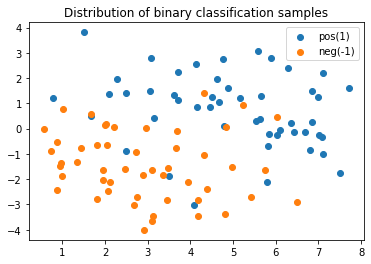

In [19]:
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.legend()
plt.show()

<b>Implement Newton’s
method for optimizing J(θ), and apply it to fit a logistic regression model to the data.

Initialize Newton’s method with θ = ~0 (the vector of all zeros).

What are the coefficients θ
resulting from your fit? (Remember to include the intercept term.)</b>

# Newton's method

In [20]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns #sets up styles and gives us more plotting options

In [21]:
df_x = pd.read_csv("logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [22]:
df_y.head()

,y
0,-1
1,-1
2,-1
3,-1
4,-1


In [23]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
y = df_y["y"].values

In [24]:
x[:3]#fill first column of x with 1

array([[ 1.        ,  1.3432504 , -1.3311479 ],
       [ 1.        ,  1.8205529 , -0.6346681 ],
       [ 1.        ,  0.98632067, -1.8885762 ]])

## define sigmoid function

$logistic(x) = \frac{1}{1+e^{-x}}$

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [26]:
tmp = np.arange(-5,5,0.00001)

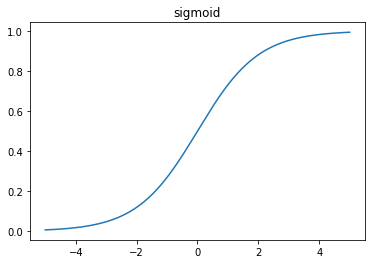

In [27]:
plt.title("sigmoid")
plt.plot(tmp,sigmoid(np.array(tmp)))
plt.show()

input
$z= \theta^Tx$

activation
$h_{\theta}(x) = \frac{1}{1+e^{-\theta^Tx}}$

derivative of sigmoid function

$\frac{d(sigmoid(x))}{dx} = sigmoid(x)(1-sigmoid(x))$


In [35]:
def grad_l(theta, x, y):
    z = y*x.dot(theta)
    g = -np.mean((1-sigmoid(z))*y*x.T, axis=1)
    return g

#Hessain matrix
def hess_l(theta, x, y):
    hess = np.zeros((x.shape[1], x.shape[1]))
    z = y*x.dot(theta)
    for i in range(hess.shape[0]):
        for j in range(hess.shape[0]):
            if i <= j:
                hess[i][j] = np.mean(sigmoid(z)*(1-sigmoid(z))*x[:,i]*x[:,j])
                if i != j:
                    hess[j][i] = hess[i][j] 
    return hess

# Newton's rule

$\theta := \theta - H^{-1}Δ_{\theta}J(\theta)$

In [32]:
def newton(theta0, x, y, G, H, eps):
    theta = theta0
    delta = 1
    while delta > eps:
        theta_prev = theta.copy()
        theta -= np.linalg.inv(H(theta, x, y)).dot(G(theta, x, y))
        delta = np.linalg.norm(theta-theta_prev, ord=1)
    return theta

## initialize theta

In [169]:
theta = [0.,0.,0.]#initialize theta

In [170]:
from typing import Callable
#미분값
def derivative(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [226]:
import math
def f(theta,x,y):
  h_ = h(theta,x)
  inside = []
  for a,b in zip(h_,y):
    inside.append(a-b)
  
  return inside

In [230]:
def h(theta,x):
  def z(theta,x):
    result = []
    for i in range(len(x)):
      tmp_result = float(theta[0]+theta[1]*x[i][0]+theta[2]*x[i][1])
      #print("tmp_result",tmp_result)
      result.append(tmp_result)
    return result
  def g(theta,x):#sigmoid
    received = z(theta,x)
    #print(len(received))
    received = [-1*x for x in received]
    inside = received
    #print(len(inside),len(x))
    down = []
    for i in range(len(x)):
      tmp_down = 1+math.exp(inside[i])
      down.append(tmp_down)
    result = [1./d for d in down]
    return result
  return g(theta,x)

In [ ]:
def derivative_of_l(theta,x,y):
  h_theta = h(theta,x)
  

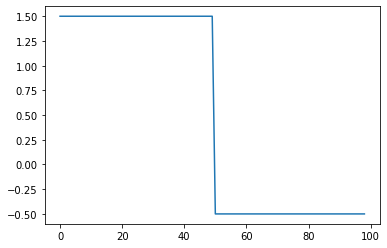

In [231]:
plt.plot(range(len(x)),f(theta,x,y))